# 📊 Evaluation: Vest Detection Knowledge Retention After Fine-Tuning on Helmet


## 🎯 Objective
Assess whether the YOLO model **retains its performance on the "Safety-Vests" class** after being fine-tuned on a new dataset containing only the "Helmet" class.

---

## 📈 Results Summary

| Metric         | Before (Only Vest Trained) | After (Post Helmet Fine-Tuning) |
|----------------|----------------------------|----------------------------------|
| mAP50          | **0.995**                  | **0.106**                        |
| mAP50-95       | **0.940**                  | **0.0466**                       |
| Precision (P)  | **0.999**                  | **0.00978**                      |
| Recall (R)     | **1.000**                  | **0.939**                        |

---

## 🧠 Key Observations

- **Severe forgetting occurred**: mAP dropped from **0.995 → 0.106**, indicating that the model **lost most of its ability to detect vests** after fine-tuning on helmets.
- **Precision collapsed**, suggesting the model still tries to detect vests (due to preserved head structure), but predictions are now mostly incorrect.
- **Recall stayed high**, implying the model is still "seeing" vest-like objects, but associating them incorrectly.

---

## ✅ Interpretation

Despite keeping the `'Safety-Vests'` class in the `.yaml` file during helmet training, the model **unlearned the vest knowledge** due to:

- **Absence of vest labels in the second dataset**, causing vests to be treated as background

---

## 💡 Next Step Suggestions

- try **joint training** with merged datasets to avoid forgetting (didn't work)
- Try **freezing some layers** for class 0 (vest) during helmet training (didn't work)
- Explore annotating the datasets with missing classes' labels
(explored in another annotation notebook, best solution yet!)

# 💻 Experiment Implementation

##### Setup

In [ ]:
# Install Ultralytics
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##### 📌 Phase 1: Fine-Tune on `vest` Only



In [ ]:
# Load and train on vest dataset
model_vest = YOLO('yolov8n.pt')  # small model for speed

100%|██████████| 6.25M/6.25M [00:00<00:00, 348MB/s]


In [ ]:
model_vest.train(
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml',
    epochs=20,
    imgsz=640,
    project='/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment',
    name='yolov8n_vest'
)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_vest2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, 

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 426MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.0 MB/s, size: 73.6 KB)


train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [02:17<00:00,  6.43it/s]


train: New cache created: /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 0.1±0.0 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:12<00:00,  4.05it/s]

val: New cache created: /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.09G     0.9336      1.665      1.354          8        640: 100%|██████████| 56/56 [00:07<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         52         52      0.776      0.615      0.685      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.31G     0.8772      1.086      1.253          7        640: 100%|██████████| 56/56 [00:05<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         52         52      0.688      0.635      0.802      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.34G      0.872     0.9186      1.242          6        640: 100%|██████████| 56/56 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         52         52      0.793      0.812      0.849        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.36G     0.8456     0.8074      1.225          5        640: 100%|██████████| 56/56 [00:05<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         52         52      0.961          1      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.37G     0.7937     0.7003      1.187          6        640: 100%|██████████| 56/56 [00:05<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         52         52          1      0.978      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.39G     0.7844     0.6597      1.176          6        640: 100%|██████████| 56/56 [00:05<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         52         52      0.981      0.994      0.994      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.41G     0.7525     0.6203      1.162          5        640: 100%|██████████| 56/56 [00:05<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         52         52      0.978          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.42G     0.7092     0.5381       1.12          8        640: 100%|██████████| 56/56 [00:05<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         52         52      0.995          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.44G     0.6659     0.5144      1.107          3        640: 100%|██████████| 56/56 [00:05<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         52         52       0.98          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.46G     0.6633     0.4796      1.097          5        640: 100%|██████████| 56/56 [00:05<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         52         52       0.96          1      0.994      0.821


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.47G     0.5746     0.4654      1.062          2        640: 100%|██████████| 56/56 [00:06<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         52         52      0.999          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.49G     0.5206     0.4045      1.044          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         52         52      0.963      0.997      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.51G     0.5024     0.3747      1.015          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         52         52      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.53G     0.4604     0.3447     0.9711          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all         52         52      0.999          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.54G     0.4376     0.3223     0.9614          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all         52         52      0.999          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.56G     0.4122     0.3078     0.9544          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         52         52      0.999          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.58G     0.3758     0.2816      0.923          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         52         52      0.999          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.59G     0.3584     0.2644     0.9137          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         52         52      0.999          1      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.61G      0.355     0.2595     0.9117          2        640: 100%|██████████| 56/56 [00:05<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         52         52      0.999          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.63G     0.3174     0.2416     0.8916          2        640: 100%|██████████| 56/56 [00:05<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         52         52      0.999          1      0.995      0.921



20 epochs completed in 0.036 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest2/weights/last.pt, 6.2MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest2/weights/best.pt, 6.2MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest2/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         52         52      0.999          1      0.995       0.92
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799482b03dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Evaluate `vest` Performance (Before Helmet Training):

In [ ]:
# Evaluate vest performance before helmet training
metrics_before = model_vest.val(split='test',
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml'
)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 77.0 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/test/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:13<00:00,  3.53it/s]

val: New cache created: /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]


                   all         49         49      0.999          1      0.995       0.94
Speed: 3.2ms preprocess, 11.3ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest22


##### 🔁 Phase 2: Fine-Tune on `helmet` Dataset (with `vest` still in class list)

In [ ]:
original_path = '/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_0.2k'
new_path = '/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled'

# Copy the whole dataset folder (images + labels)
shutil.copytree(original_path, new_path)

'/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled'

In [ ]:
def relabel_folder(label_folder):
    for filename in os.listdir(label_folder):
        if filename.endswith('.txt'):
            filepath = os.path.join(label_folder, filename)
            with open(filepath, 'r') as f:
                lines = f.readlines()
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0:
                    parts[0] = '1'  # class 1 = Helmet
                    new_lines.append(' '.join(parts) + '\n')
            with open(filepath, 'w') as f:
                f.writelines(new_lines)

# Relabel in all splits
for split in ['train', 'valid', 'test']:
    label_path = os.path.join(new_path, split, 'labels')
    relabel_folder(label_path)

In [ ]:
yaml_text = """
path: /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled

train: train/images
val: valid/images
test: test/images

# ⚠️ Class 0 is Safety-Vests (from earlier dataset)
# Class 1 is Helmet (relabelled here)
nc: 2
names: ['Safety-Vests', 'Helmet']
"""

with open("/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml", "w") as f:
    f.write(yaml_text)

In [ ]:
# Load previous model weights
model_helmet = YOLO('/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest/weights/best.pt')

In [ ]:
# Fine-tune on helmet dataset while keeping vest in class list
model_helmet.train(
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml',
    epochs=60,
    imgsz=640,
    project='/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment',
    name='yolov8n_helmet'
)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=Fal

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<00:00, 202.98it/s]


train: New cache created: /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 3.9±2.6 ms, read: 6.2±6.3 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<00:00, 172.46it/s]

val: New cache created: /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet2
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.31G      3.018       4.84      2.454         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         39        154    0.00148     0.0714   0.000996   0.000327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.31G      2.248       4.23      1.856         63        640: 100%|██████████| 9/9 [00:01<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         39        154    0.00674      0.279     0.0759     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.31G      1.769      3.341      1.389         33        640: 100%|██████████| 9/9 [00:00<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         39        154       0.53      0.266      0.257      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.31G      1.688      2.424      1.275         67        640: 100%|██████████| 9/9 [00:01<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         39        154      0.563      0.427       0.43      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.31G      1.535      1.957      1.175         93        640: 100%|██████████| 9/9 [00:01<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         39        154      0.672      0.422      0.519      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.31G      1.448      1.799      1.136         53        640: 100%|██████████| 9/9 [00:01<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         39        154      0.809      0.496      0.607        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.31G      1.295      1.516      1.078         42        640: 100%|██████████| 9/9 [00:00<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         39        154      0.761       0.61      0.674      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.32G       1.32      1.458      1.078         64        640: 100%|██████████| 9/9 [00:01<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         39        154      0.823      0.643      0.743      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.34G      1.232      1.375      1.066         30        640: 100%|██████████| 9/9 [00:01<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         39        154      0.847      0.681      0.774      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.35G      1.256      1.263      1.027         36        640: 100%|██████████| 9/9 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all         39        154      0.813      0.708      0.803      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.37G      1.247      1.242      1.045         53        640: 100%|██████████| 9/9 [00:00<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         39        154      0.798       0.76      0.806      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.39G      1.211      1.155      1.036         58        640: 100%|██████████| 9/9 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         39        154      0.878      0.746      0.834      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60       2.4G      1.213      1.143       1.04         42        640: 100%|██████████| 9/9 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all         39        154      0.838      0.786      0.847      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.42G      1.125      1.049      1.002         59        640: 100%|██████████| 9/9 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         39        154       0.84      0.773      0.829      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.44G      1.155      1.128      1.041         65        640: 100%|██████████| 9/9 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         39        154      0.852      0.773      0.849      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.46G       1.15      1.009     0.9971         58        640: 100%|██████████| 9/9 [00:00<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         39        154      0.908      0.765      0.848      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.47G      1.109     0.9512     0.9867         58        640: 100%|██████████| 9/9 [00:00<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all         39        154      0.858      0.773      0.864      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.49G      1.116     0.9521      1.009         46        640: 100%|██████████| 9/9 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         39        154      0.863       0.78      0.862      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.51G      1.036       0.92       0.98         54        640: 100%|██████████| 9/9 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         39        154      0.881      0.772      0.852      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.52G      1.106     0.9212     0.9876         35        640: 100%|██████████| 9/9 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         39        154      0.879      0.803      0.868      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.54G      1.124     0.9225      1.012         64        640: 100%|██████████| 9/9 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         39        154      0.895      0.766      0.859       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.56G      1.027     0.8633     0.9678         37        640: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.02it/s]

                   all         39        154      0.905      0.804      0.875      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.57G     0.9895     0.8107      0.962         36        640: 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         39        154      0.901      0.779      0.865      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.59G      1.018     0.8399     0.9723         38        640: 100%|██████████| 9/9 [00:00<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         39        154      0.885      0.797      0.876      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.61G      1.001     0.7955     0.9629         50        640: 100%|██████████| 9/9 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         39        154      0.911      0.796      0.865      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.63G      1.025     0.7912     0.9559         53        640: 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         39        154      0.851      0.816      0.867      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.64G     0.9621     0.7521     0.9399         57        640: 100%|██████████| 9/9 [00:00<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         39        154      0.873      0.792      0.872      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.66G     0.9321     0.7377     0.9442         63        640: 100%|██████████| 9/9 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         39        154      0.887      0.818      0.883      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.68G      1.033     0.8035     0.9543         60        640: 100%|██████████| 9/9 [00:00<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         39        154      0.879      0.847       0.89      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60       2.7G     0.9779     0.7691     0.9405         47        640: 100%|██████████| 9/9 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         39        154      0.908       0.87      0.905      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.71G     0.9586      0.741     0.9418         82        640: 100%|██████████| 9/9 [00:00<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         39        154      0.922      0.847      0.913      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.73G     0.9521     0.7335     0.9424         55        640: 100%|██████████| 9/9 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all         39        154      0.949      0.843      0.916      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.74G     0.9453      0.706     0.9294         44        640: 100%|██████████| 9/9 [00:01<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         39        154      0.928      0.836      0.902      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.76G     0.9468     0.7382     0.9399         49        640: 100%|██████████| 9/9 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


                   all         39        154      0.934      0.833      0.904      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.78G     0.9324     0.7025     0.9337         83        640: 100%|██████████| 9/9 [00:01<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         39        154      0.946        0.8      0.906      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60       2.8G     0.9307     0.6945     0.9341         68        640: 100%|██████████| 9/9 [00:01<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]

                   all         39        154      0.934      0.827        0.9      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.81G     0.8837     0.6569     0.9269         56        640: 100%|██████████| 9/9 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         39        154      0.951      0.818      0.904      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.83G     0.8984     0.6737     0.9186         55        640: 100%|██████████| 9/9 [00:01<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]

                   all         39        154      0.965      0.818      0.909      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.85G     0.8924     0.6641     0.9268         55        640: 100%|██████████| 9/9 [00:00<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]

                   all         39        154      0.938      0.851      0.903       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.87G     0.8655     0.6415     0.9154         55        640: 100%|██████████| 9/9 [00:01<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         39        154      0.903      0.844      0.905      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.88G     0.8731     0.6357     0.9244         45        640: 100%|██████████| 9/9 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         39        154      0.939      0.806      0.901      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60       2.9G     0.8796     0.6609     0.9143         50        640: 100%|██████████| 9/9 [00:01<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all         39        154       0.92      0.844      0.903      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.92G     0.8734     0.6209     0.8945         55        640: 100%|██████████| 9/9 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all         39        154      0.926      0.818      0.906      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.93G     0.8664     0.6264     0.9164         80        640: 100%|██████████| 9/9 [00:00<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all         39        154      0.882      0.851      0.901      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.95G     0.8525     0.6328     0.9092         64        640: 100%|██████████| 9/9 [00:00<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         39        154      0.921      0.831      0.907      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.97G     0.8704      0.607     0.9005         41        640: 100%|██████████| 9/9 [00:00<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         39        154      0.962      0.818      0.903      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.98G     0.8081     0.5928     0.9013         41        640: 100%|██████████| 9/9 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         39        154      0.909      0.857      0.914      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60         3G     0.8322     0.6106     0.9059         35        640: 100%|██████████| 9/9 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         39        154      0.928      0.825      0.905      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      3.02G     0.8255     0.5946     0.8947         62        640: 100%|██████████| 9/9 [00:00<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         39        154      0.942      0.839       0.91      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      3.04G     0.7669     0.5751     0.8818         52        640: 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all         39        154      0.909      0.844      0.908      0.582


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      3.05G     0.7955     0.6097     0.8895         29        640: 100%|██████████| 9/9 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         39        154      0.902      0.857      0.913      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      3.07G     0.7904      0.599     0.8735         27        640: 100%|██████████| 9/9 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         39        154      0.922      0.818      0.905      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      3.09G     0.7773     0.6001     0.8759         29        640: 100%|██████████| 9/9 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         39        154      0.926      0.799      0.899      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60       3.1G     0.7544     0.5706     0.8646         23        640: 100%|██████████| 9/9 [00:00<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all         39        154       0.93      0.812      0.896      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      3.12G     0.7378     0.5481     0.8762         27        640: 100%|██████████| 9/9 [00:01<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         39        154      0.939      0.799      0.899      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      3.14G     0.7376      0.531      0.865         29        640: 100%|██████████| 9/9 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         39        154      0.863      0.859      0.899      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      3.15G     0.7243     0.5718     0.8649         44        640: 100%|██████████| 9/9 [00:00<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         39        154      0.872      0.864      0.894      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      3.17G     0.7209     0.5314     0.8769         49        640: 100%|██████████| 9/9 [00:00<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         39        154      0.952      0.805      0.895      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      3.19G      0.733     0.5499     0.8739         28        640: 100%|██████████| 9/9 [00:00<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         39        154      0.954      0.807      0.895      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      3.21G     0.7483     0.5588     0.8766         20        640: 100%|██████████| 9/9 [00:01<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         39        154      0.947      0.811      0.895      0.595



60 epochs completed in 0.026 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet2/weights/last.pt, 6.2MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet2/weights/best.pt, 6.2MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet2/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]


                   all         39        154      0.941      0.833      0.909      0.593
                Helmet         39        154      0.941      0.833      0.909      0.593
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799473c8d2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Re-evaluate `vest` Performance (After Helmet Fine-Tuning)

In [ ]:
# Reload the updated model
model_after = YOLO('/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet2/weights/best.pt')

In [ ]:
# Evaluate on the original vest dataset
metrics_after = model_after.val(split='test',
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml'
)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 29.3±17.4 MB/s, size: 72.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/test/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


                   all         49         49    0.00978      0.939      0.106     0.0466
          Safety-Vests         49         49    0.00978      0.939      0.106     0.0466
Speed: 2.0ms preprocess, 2.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val2


# 💻 Sol°1: Joint Training

In [ ]:
num_epochs = 30
base_path = '/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft'
run_prefix = 'yolov8m_alt_ft'

initial_weights = 'yolov8m.pt'

for epoch in range(num_epochs):
    dataset_yaml = (
        '/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml' if epoch % 2 == 0
        else '/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml'
    )

    print(f"🔁 Epoch {epoch+1}/{num_epochs} on", "Helmet" if epoch % 2 == 0 else "Vest")

    # Load from previous epoch's best.pt
    if epoch == 0:
        model_path = initial_weights
    else:
        model_path = f"{base_path}/{run_prefix}{epoch}/weights/best.pt"

    model = YOLO(model_path)

    model.train(
        data=dataset_yaml,
        epochs=1,
        resume=False,
        imgsz=640,
        batch=16,
        project=base_path,
        name=f'{run_prefix}{epoch+1}',
        exist_ok=True
    )

🔁 Epoch 1/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_alt_ft1, nbs=64, nms=False, opset=None, optimize=False, opt

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.4 ms, read: 17.9±9.3 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft1
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      6.74G      1.567      4.031      1.398         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]


                   all         39        154      0.647      0.716      0.714      0.466

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft1/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft1/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft1/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]


                   all         39        154      0.647      0.715      0.713      0.466
                Helmet         39        154      0.647      0.715      0.713      0.466
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft1
🔁 Epoch 2/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fli

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 87.4±191.4 ms, read: 8.5±8.1 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G     0.9238      1.724      1.338          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]


                   all         52         52      0.687      0.904      0.806      0.475

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft2/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft2/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft2/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]


                   all         52         52      0.671      0.885      0.772      0.473
          Safety-Vests         52         52      0.671      0.885      0.772      0.473
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft2
🔁 Epoch 3/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.8 ms, read: 18.7±11.2 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G      1.795       4.84      1.512         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]


                   all         39        154      0.499      0.513       0.45      0.241

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft3/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft3/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft3/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]


                   all         39        154      0.493      0.498       0.45      0.243
                Helmet         39        154      0.493      0.498       0.45      0.243
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft3
🔁 Epoch 4/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fli

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 30.1±2.9 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.46G     0.8086      1.787      1.239          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]


                   all         52         52     0.0569      0.462      0.041     0.0167

1 epochs completed in 0.004 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft4/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft4/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft4/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]


                   all         52         52     0.0569      0.462     0.0408      0.017
          Safety-Vests         52         52     0.0569      0.462     0.0408      0.017
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft4
🔁 Epoch 5/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.5±2.0 ms, read: 19.4±8.8 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft5
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.44G      1.789      5.637      1.542         41        640: 100%|██████████| 9/9 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]


                   all         39        154     0.0494      0.227      0.077      0.032

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft5/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft5/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft5/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]


                   all         39        154     0.0492      0.227     0.0769     0.0319
                Helmet         39        154     0.0492      0.227     0.0769     0.0319
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft5
🔁 Epoch 6/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fli

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 25.2±6.1 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft6
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.44G      0.708     0.8729      1.169          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]


                   all         52         52      0.925      0.951      0.979      0.724

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft6/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft6/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft6/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]


                   all         52         52      0.925       0.95      0.979      0.724
          Safety-Vests         52         52      0.925       0.95      0.979      0.724
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft6
🔁 Epoch 7/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.9±0.3 ms, read: 15.4±9.0 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft7
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G       1.85      6.284      1.532         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]


                   all         39        154      0.423     0.0714      0.251      0.164

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft7/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft7/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft7/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]


                   all         39        154      0.423     0.0714      0.251      0.164
                Helmet         39        154      0.423     0.0714      0.251      0.164
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft7
🔁 Epoch 8/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fli

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.8±5.2 ms, read: 13.9±12.9 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft8
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.44G     0.6243     0.6896      1.117          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]


                   all         52         52      0.997      0.962      0.988      0.738

1 epochs completed in 0.004 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft8/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft8/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft8/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         52         52      0.998      0.962      0.988      0.741
          Safety-Vests         52         52      0.998      0.962      0.988      0.741
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft8
🔁 Epoch 9/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.2±0.6 ms, read: 12.1±4.9 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft9
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G      1.733      6.938      1.503         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]


                   all         39        154      0.733     0.0714      0.412      0.238

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft9/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft9/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft9/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]


                   all         39        154      0.733     0.0714      0.412      0.238
                Helmet         39        154      0.733     0.0714      0.412      0.238
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft9
🔁 Epoch 10/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fl

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.0 ms, read: 27.0±10.2 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft10
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.46G     0.5854      0.561      1.079          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]


                   all         52         52      0.981      0.976      0.989      0.793

1 epochs completed in 0.004 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft10/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft10/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft10/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]


                   all         52         52      0.981      0.976      0.989      0.787
          Safety-Vests         52         52      0.981      0.976      0.989      0.787
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft10
🔁 Epoch 11/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.0±0.6 ms, read: 10.1±10.2 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft11
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.44G      1.817      7.126      1.516         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]


                   all         39        154       0.75     0.0779      0.413      0.228

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft11/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft11/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft11/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]


                   all         39        154       0.75     0.0779      0.413      0.228
                Helmet         39        154       0.75     0.0779      0.413      0.228
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft11
🔁 Epoch 12/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 36.4±16.0 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft12
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.47G     0.5617     0.5614      1.063          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]


                   all         52         52      0.985      0.981      0.995      0.773

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft12/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft12/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft12/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


                   all         52         52      0.984      0.981      0.995      0.773
          Safety-Vests         52         52      0.984      0.981      0.995      0.773
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft12
🔁 Epoch 13/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 14.5±15.0 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft13
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.44G      1.981      7.941      1.634         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]


                   all         39        154          0          0          0          0

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft13/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft13/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft13/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]


                   all         39        154          0          0          0          0
                Helmet         39        154          0          0          0          0
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft13
🔁 Epoch 14/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 23.9±51.5 ms, read: 14.9±9.8 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft14
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.47G     0.5192      0.512      1.029          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]


                   all         52         52       0.71      0.904      0.715      0.605

1 epochs completed in 0.004 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft14/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft14/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft14/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]


                   all         52         52       0.71      0.904      0.715      0.598
          Safety-Vests         52         52       0.71      0.904      0.715      0.598
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft14
🔁 Epoch 15/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.4 ms, read: 9.9±6.6 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft15
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.46G      1.783      7.544      1.459         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]


                   all         39        154       0.66      0.214      0.441      0.234

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft15/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft15/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft15/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]


                   all         39        154      0.673      0.214      0.447      0.237
                Helmet         39        154      0.673      0.214      0.447      0.237
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft15
🔁 Epoch 16/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 26.7±6.1 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft16
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.47G     0.5272     0.4698      1.038          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]


                   all         52         52      0.904      0.942      0.962      0.713

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft16/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft16/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft16/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]


                   all         52         52        0.9      0.942      0.961      0.709
          Safety-Vests         52         52        0.9      0.942      0.961      0.709
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft16
🔁 Epoch 17/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.8 ms, read: 17.3±6.7 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft17/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft17
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G      2.026      8.401      1.592         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]


                   all         39        154      0.882     0.0974      0.493      0.321

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft17/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft17/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft17/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]


                   all         39        154      0.882     0.0974      0.493      0.321
                Helmet         39        154      0.882     0.0974      0.493      0.321
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft17
🔁 Epoch 18/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 28.4±13.0 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft18/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft18
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.47G     0.4733     0.4021          1          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]


                   all         52         52      0.992      0.865      0.972      0.813

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft18/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft18/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft18/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]


                   all         52         52      0.992      0.865      0.972      0.814
          Safety-Vests         52         52      0.992      0.865      0.972      0.814
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft18
🔁 Epoch 19/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.2±0.7 ms, read: 17.0±8.8 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft19
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.46G      2.025      8.362      1.543         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]


                   all         39        154          0          0          0          0

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft19/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft19/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft19/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]


                   all         39        154          0          0          0          0
                Helmet         39        154          0          0          0          0
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft19
🔁 Epoch 20/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 16.6±35.3 ms, read: 16.3±14.7 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft20/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft20
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G     0.4487     0.3614     0.9903          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]


                   all         52         52      0.362      0.981      0.364       0.31

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft20/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft20/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft20/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


                   all         52         52      0.364      0.981      0.364       0.31
          Safety-Vests         52         52      0.364      0.981      0.364       0.31
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft20
🔁 Epoch 21/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.9±0.7 ms, read: 10.2±6.6 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft21/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft21
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G      2.199      8.512      1.697         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]


                   all         39        154          0          0          0          0

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft21/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft21/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft21/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]


                   all         39        154          0          0          0          0
                Helmet         39        154          0          0          0          0
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft21
🔁 Epoch 22/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 30.3±4.0 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft22
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.48G     0.4378     0.3824     0.9805          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]


                   all         52         52      0.945      0.923      0.977      0.821

1 epochs completed in 0.004 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft22/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft22/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft22/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]


                   all         52         52      0.945      0.923      0.977      0.818
          Safety-Vests         52         52      0.945      0.923      0.977      0.818
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft22
🔁 Epoch 23/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.5±1.1 ms, read: 13.6±7.7 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft23
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G      1.932      8.529      1.486         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]


                   all         39        154        0.5     0.0195      0.262      0.157

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft23/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft23/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft23/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]


                   all         39        154        0.5     0.0195      0.262      0.157
                Helmet         39        154        0.5     0.0195      0.262      0.157
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft23
🔁 Epoch 24/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 30.9±10.8 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft24
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.48G     0.4188     0.3366       0.97          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]


                   all         52         52      0.992          1      0.995      0.856

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft24/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft24/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft24/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


                   all         52         52      0.992          1      0.995      0.856
          Safety-Vests         52         52      0.992          1      0.995      0.856
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft24
🔁 Epoch 25/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.0±0.9 ms, read: 12.7±6.0 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft25/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft25
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.46G       1.94      8.392      1.464         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


                   all         39        154          0          0          0          0

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft25/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft25/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft25/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]


                   all         39        154          0          0          0          0
                Helmet         39        154          0          0          0          0
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft25
🔁 Epoch 26/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 12.3±25.0 ms, read: 13.1±12.1 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft26/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft26
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.47G      0.398     0.3279     0.9607          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]


                   all         52         52      0.605      0.846       0.66      0.509

1 epochs completed in 0.003 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft26/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft26/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft26/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]


                   all         52         52      0.605      0.846       0.66      0.509
          Safety-Vests         52         52      0.605      0.846       0.66      0.509
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft26
🔁 Epoch 27/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.8 ms, read: 17.3±10.0 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft27/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft27
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.45G      1.914      8.795      1.486         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


                   all         39        154          0          0          0          0

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft27/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft27/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft27/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all         39        154          0          0          0          0
                Helmet         39        154          0          0          0          0
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft27
🔁 Epoch 28/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.2±0.7 ms, read: 23.4±6.8 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft28/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft28
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.48G     0.3897     0.3296     0.9527          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]


                   all         52         52      0.359      0.981      0.378      0.312

1 epochs completed in 0.004 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft28/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft28/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft28/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]


                   all         52         52       0.36      0.981      0.378      0.312
          Safety-Vests         52         52       0.36      0.981      0.378      0.312
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft28
🔁 Epoch 29/30 on Helmet
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True,

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.5 ms, read: 12.5±6.0 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft29/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft29
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.46G      1.869      8.504      1.422         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]


                   all         39        154          1    0.00649      0.503      0.302

1 epochs completed in 0.002 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft29/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft29/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft29/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]


                   all         39        154          1    0.00649      0.503      0.302
                Helmet         39        154          1    0.00649      0.503      0.302
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft29
🔁 Epoch 30/30 on Vest
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, f

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/train/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 35.0±10.8 MB/s, size: 78.7 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft30/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft30
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      7.48G     0.3592     0.2945     0.9368          8        640: 100%|██████████| 56/56 [00:08<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]


                   all         52         52      0.976      0.981      0.993      0.807

1 epochs completed in 0.004 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft30/weights/last.pt, 52.0MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft30/weights/best.pt, 52.0MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft30/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]


                   all         52         52      0.976      0.981      0.993      0.801
          Safety-Vests         52         52      0.976      0.981      0.993      0.801
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft30


In [ ]:
# Reload the updated model
final_model = YOLO('/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft/yolov8m_alt_ft30/weights/best.pt')

In [ ]:
# Evaluate on the original vest dataset
metrics_vest  = final_model.val(split='test',
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml'
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 37.2±4.8 MB/s, size: 77.0 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/test/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


                   all         49         49      0.986       0.98      0.995      0.837
          Safety-Vests         49         49      0.986       0.98      0.995      0.837
Speed: 3.7ms preprocess, 2.6ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/val34


In [ ]:
# Evaluate on the original helmet dataset
metrics_helmet  = final_model.val(split='test',
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml'
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 33.7±9.2 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/test/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


                   all         22         82          0          0          0          0
                Helmet         22         82          0          0          0          0
Speed: 2.4ms preprocess, 3.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val35


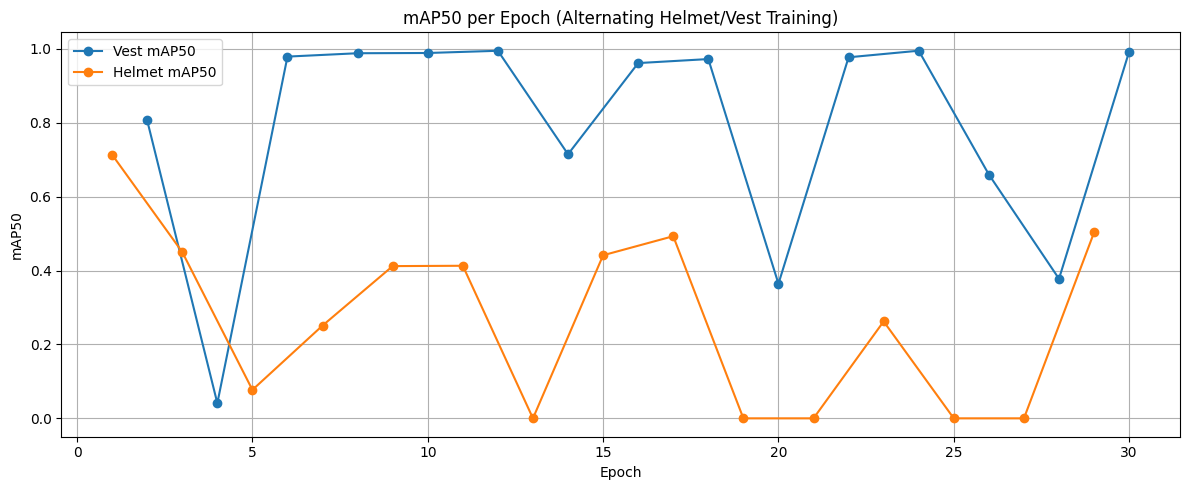

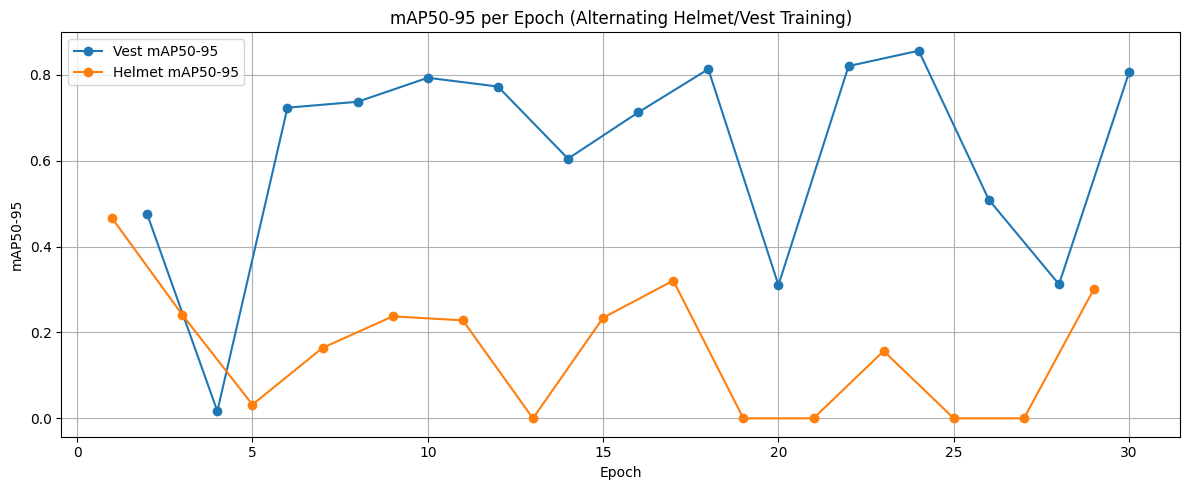

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the base directory where the epoch folders are stored
base_dir = "/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8m_alt_ft"
prefix = "yolov8m_alt_ft"

# Initialize lists to store data
epochs = []
mAP50 = []
mAP50_95 = []
class_type = []

# Loop over all folders with epoch results
for epoch in range(1, 31):  # 1 to 30
    folder = os.path.join(base_dir, f"{prefix}{epoch}")
    results_csv = os.path.join(folder, "results.csv")

    if os.path.exists(results_csv):
        df = pd.read_csv(results_csv)
        # Take the last row for metrics
        last_row = df.iloc[-1]
        epochs.append(epoch)
        mAP50.append(last_row['metrics/mAP50(B)'])
        mAP50_95.append(last_row['metrics/mAP50-95(B)'])
        class_type.append("Helmet" if epoch % 2 == 1 else "Vest")  # Odd=Helmet, Even=Vest

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Epoch": epochs,
    "mAP50": mAP50,
    "mAP50_95": mAP50_95,
    "Class": class_type
})

# Plot mAP50
plt.figure(figsize=(12, 5))
for cls in ["Vest", "Helmet"]:
    subset = metrics_df[metrics_df["Class"] == cls]
    plt.plot(subset["Epoch"], subset["mAP50"], marker='o', label=f'{cls} mAP50')
plt.xlabel("Epoch")
plt.ylabel("mAP50")
plt.title("mAP50 per Epoch (Alternating Helmet/Vest Training)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot mAP50-95
plt.figure(figsize=(12, 5))
for cls in ["Vest", "Helmet"]:
    subset = metrics_df[metrics_df["Class"] == cls]
    plt.plot(subset["Epoch"], subset["mAP50_95"], marker='o', label=f'{cls} mAP50-95')
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.title("mAP50-95 per Epoch (Alternating Helmet/Vest Training)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 💻 Sol°2: Freezing Layers (didn't work)

In [ ]:
# Load previous model weights
model_helmet = YOLO('/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest/weights/best.pt')

In [ ]:
# Fine-tune on helmet dataset while keeping vest in class list
model_helmet.train(
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml',
    epochs=30,  # 👈 this is the key line (less epochs to overwrite less)
    imgsz=640,
    project='/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment',
    name='yolov8m_helmet_frozen',
    freeze=15  # 👈 this is the key line (blocks 0-14 frozen)

)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=15, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_vest/weights/best.pt, momentum=0.937, mosaic=1.0, multi

train: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/train/labels.cache... 139 images, 0 backgrounds, 0 corrupt: 100%|██████████| 139/139 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 14.6±6.5 MB/s, size: 39.1 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/Helmet/helmet_relabelled/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet_frozen3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet_frozen3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.17G      2.974      4.107      2.535         41        640: 100%|██████████| 9/9 [00:01<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         39        154          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.28G      2.812      3.765      2.377         63        640: 100%|██████████| 9/9 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.25it/s]


                   all         39        154   0.000715     0.0325   0.000417   0.000152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.28G       2.62      3.474      2.265         33        640: 100%|██████████| 9/9 [00:00<00:00, 14.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]


                   all         39        154    0.00083     0.0455    0.00162    0.00044

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.28G       2.61      3.251      2.101         67        640: 100%|██████████| 9/9 [00:00<00:00, 14.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         39        154     0.0013     0.0714    0.00935    0.00142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.28G      2.347      2.963      1.944         93        640: 100%|██████████| 9/9 [00:00<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]


                   all         39        154    0.00298      0.149     0.0132    0.00439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.28G      2.325      2.917      1.896         53        640: 100%|██████████| 9/9 [00:00<00:00, 14.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all         39        154    0.00705      0.318     0.0524     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.28G      2.205      2.788      1.788         42        640: 100%|██████████| 9/9 [00:00<00:00, 15.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]


                   all         39        154      0.352     0.0248      0.105     0.0423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.28G      2.248      2.667       1.72         64        640: 100%|██████████| 9/9 [00:00<00:00, 15.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all         39        154      0.707     0.0628      0.197     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.28G      2.083      2.569      1.677         30        640: 100%|██████████| 9/9 [00:00<00:00, 14.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


                   all         39        154      0.521       0.13      0.243      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.28G      2.015       2.47      1.549         36        640: 100%|██████████| 9/9 [00:00<00:00, 15.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.79it/s]

                   all         39        154      0.506      0.208       0.26       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.28G      2.019      2.379      1.549         53        640: 100%|██████████| 9/9 [00:00<00:00, 16.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]


                   all         39        154      0.725      0.234      0.372      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.28G      2.031      2.356      1.553         58        640: 100%|██████████| 9/9 [00:00<00:00, 14.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all         39        154      0.599       0.37      0.456      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.28G      1.995      2.314      1.553         42        640: 100%|██████████| 9/9 [00:00<00:00, 14.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         39        154       0.59      0.401      0.476      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.28G      1.869      2.089       1.44         59        640: 100%|██████████| 9/9 [00:00<00:00, 15.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         39        154      0.584      0.416      0.471      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.28G      1.881        2.2       1.46         65        640: 100%|██████████| 9/9 [00:00<00:00, 16.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]


                   all         39        154      0.673      0.429      0.504      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.29G      1.847      2.041      1.394         58        640: 100%|██████████| 9/9 [00:00<00:00, 15.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]

                   all         39        154       0.67      0.488      0.545      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       1.3G      1.824      1.968      1.392         58        640: 100%|██████████| 9/9 [00:00<00:00, 15.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]


                   all         39        154      0.722      0.489      0.567      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       1.3G      1.817      1.937      1.415         46        640: 100%|██████████| 9/9 [00:00<00:00, 15.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]


                   all         39        154      0.708      0.519      0.576      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       1.3G      1.709      1.893      1.357         54        640: 100%|██████████| 9/9 [00:00<00:00, 14.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         39        154      0.694      0.531      0.579      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       1.3G      1.863      1.871      1.381         35        640: 100%|██████████| 9/9 [00:00<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         39        154      0.695      0.545        0.6      0.299


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       1.3G      1.597      1.871      1.278         21        640: 100%|██████████| 9/9 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         39        154      0.704      0.545      0.621      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.31G      1.582       1.81      1.265         19        640: 100%|██████████| 9/9 [00:00<00:00, 14.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         39        154      0.743      0.565      0.626       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.31G       1.55       1.83      1.253         26        640: 100%|██████████| 9/9 [00:00<00:00, 14.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         39        154      0.748      0.558      0.625      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.31G      1.563      1.778      1.264         30        640: 100%|██████████| 9/9 [00:00<00:00, 13.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         39        154      0.684      0.571      0.617      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.31G      1.562      1.723       1.25         42        640: 100%|██████████| 9/9 [00:00<00:00, 14.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]


                   all         39        154      0.667      0.573      0.613      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.32G      1.545      1.784      1.268         54        640: 100%|██████████| 9/9 [00:00<00:00, 15.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]


                   all         39        154      0.683      0.571      0.624      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.32G      1.503      1.681       1.22         28        640: 100%|██████████| 9/9 [00:00<00:00, 15.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         39        154      0.706      0.591      0.626      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.32G      1.502      1.668      1.251         16        640: 100%|██████████| 9/9 [00:00<00:00, 14.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]

                   all         39        154      0.709      0.597      0.627      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.32G      1.581       1.71      1.277         38        640: 100%|██████████| 9/9 [00:00<00:00, 15.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]

                   all         39        154      0.717      0.597      0.632      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.32G      1.538       1.62      1.247         35        640: 100%|██████████| 9/9 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         39        154      0.715      0.597      0.631      0.315



30 epochs completed in 0.010 hours.
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet_frozen3/weights/last.pt, 6.2MB
Optimizer stripped from /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet_frozen3/weights/best.pt, 6.2MB

Validating /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet_frozen3/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]


                   all         39        154      0.731      0.597      0.631      0.315
                Helmet         39        154      0.731      0.597      0.631      0.315
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet_frozen3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6e9841cb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Reload the updated model
model_after = YOLO('/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolo_finetune_retention_experiment/yolov8n_helmet_frozen3/weights/best.pt')

In [ ]:
# Evaluate on the original vest dataset
metrics_after = model_after.val(split='test',
    data='/content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/data.yaml'
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 52.0±15.0 MB/s, size: 89.9 KB)


val: Scanning /content/gdrive/MyDrive/DISAL/Disal-Data/Objects/SafetyVest/safetyvest_1k/test/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


                   all         49         49    0.00539       0.51     0.0123    0.00225
          Safety-Vests         49         49    0.00539       0.51     0.0123    0.00225
Speed: 3.2ms preprocess, 1.1ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/val9
